In [66]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.stats as st
import seaborn

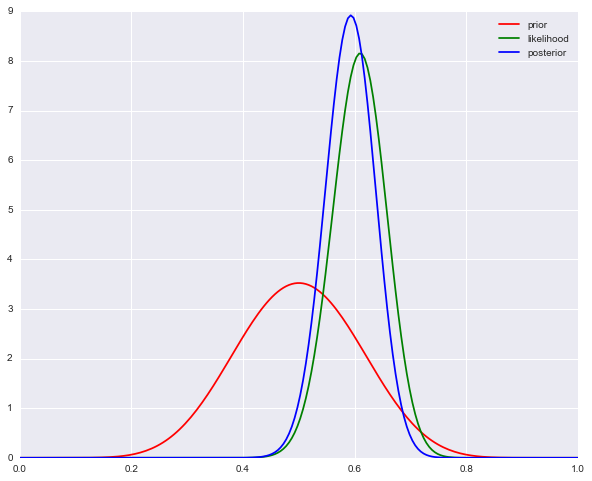

In [67]:
n=100
h=61
a,b=10,10
thetas=np.linspace(0,1,200)
prior=st.beta(a,b).pdf(thetas)
likelihood=n*st.binom(n,thetas).pmf(h)
post=prior*likelihood
post=post/post.sum()
post=post*len(thetas)
plt.figure(figsize=(10,8))
plt.plot(thetas,prior,c='red',label='prior')
plt.plot(thetas,likelihood,c='green',label='likelihood')
plt.plot(thetas,post,c='blue',label='posterior')

plt.legend()
plt.show()

In [68]:
def mcmc_select(n,h,a,b,thetas):
    if thetas<0 or thetas>1:
        return 0
    else:
        prior=st.beta(a,b).pdf(thetas)
        likelihood=n*st.binom(n,thetas).pmf(h)
        post=prior*likelihood
        return post

In [69]:
np.random.seed(0)
samples=[]
niters=10000
theta=0.1
sigma=0.1
accept=0
for i in range(niters):
    theta_p=theta+st.norm(0,sigma).rvs()
    ro=min(1,mcmc_select(n,h,a,b,theta_p)/mcmc_select(n,h,a,b,theta))
    p=np.random.uniform()
    
    if ro>p:
        accept=accept+1
        theta=theta_p
    else:
        theta=theta
    samples.append(theta)
    

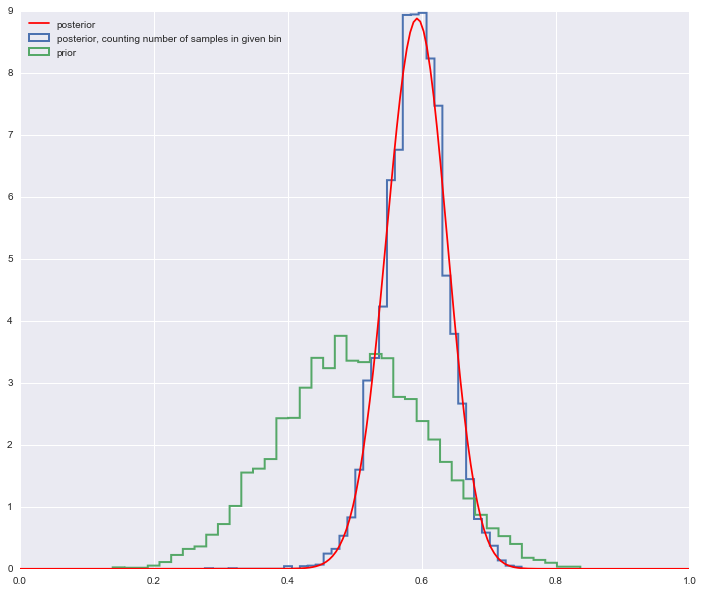

In [73]:
plt.figure(figsize=(12,10))
post=st.beta(a+h,n-h+b).pdf(thetas)
plt.hist(samples,40,histtype='step',normed='True',linewidth='2',label='posterior, counting number of samples in given bin')
plt.plot(thetas,post,label='posterior',c='red')
plt.hist(st.beta(a,b).rvs(niters),40,histtype='step',normed='True',linewidth='2',label='prior')

plt.xlim([0,1]);
plt.legend(loc='best')
plt.show()